In [1]:
import pandas as pd
import numpy as np

# 히트맵 그려보기
# %amtplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
moving = pd.read_csv('C:\project22\python\moving_all.csv', encoding = 'euc-kr')
moving.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [3]:
moving

,군구,시도,date,count
0,강릉시,강원도,2013년 01월,178140
1,고성군,강원도,2013년 01월,0
2,동해시,강원도,2013년 01월,63253
3,삼척시,강원도,2013년 01월,0
4,속초시,강원도,2013년 01월,212606
...,...,...,...,...
4423,의성군,경북,2021년 12월,36850
4424,청도군,경북,2021년 12월,58561
4425,청송군,경북,2021년 12월,38313
4426,칠곡군,경북,2021년 12월,37805


In [4]:
moving['군구'] = moving['군구'].str[:2]
moving['시도'] = moving['시도'].str[:2]
# moving['군구'].str[:2]

In [5]:
moving['month'] = moving['date'].str[-3:-1]
# moving['date'].str[-3:-1]

moving_sum = moving.groupby(['군구', 'month']).sum()

# moving['day_place'] = moving['month'] + moving['군구']
moving['day_place'] = moving['month'] + moving['시도']

moving['month'] = moving['month'].astype('str')
condition = (moving.month == '02') | (moving.month == '03') | (moving.month == '04')| (moving.month == '05')
moving = moving[condition]

moving = moving[['day_place','count']]
moving.rename(columns={'count' : 'people'})

,day_place,people
41,02강원,153154
42,02강원,0
43,02강원,53824
44,02강원,0
45,02강원,191191
...,...,...
4136,05경북,75286
4137,05경북,97675
4138,05경북,59900
4139,05경북,81781


In [6]:
sanbul = pd.read_excel('C:\project22\sanbul.xls'
                       , sheet_name = "Sheet1")

# 열 이름이 되야할 데이터 추출
index_fix = sanbul.loc[1]

# 열이름 변경
sanbul.columns = index_fix

# 필요없는 행 제거
sanbul = sanbul.drop([0, 1])

# 년 월 일 합치기?
# 날짜 데이터와 형태 같게 만들기 yyyy-mm-dd
sanbul['tm'] = sanbul['발생일시_년'] + '-' + sanbul['발생일시_월'] + '-' + sanbul['발생일시_일']

# 발생장소_시도 = 강원, 경북, 울진만 추출

condition = (sanbul.발생장소_시도 == '강원') | (sanbul.발생장소_시도 == '경북') 
sanbul_region = sanbul[condition]

# 필요 한 열 추출
sanbul_data = sanbul_region[['tm', '발생일시_월','발생일시_시간','발생장소_시도', '발생장소_시군구', '발생원인_구분', '피해면적_합계']]

### 기후
wether = pd.read_csv('C:\project22\python\wether_dataframe.csv', encoding = 'euc-kr')
wether.drop(['Unnamed: 0', 'index', 'stnId'], axis = 1, inplace=True)

wether.loc[wether['stnNm'] == '정선군', 'stnNm'] = '정선'

# sanbul.loc[sanbul['발생장소_시도'] == '울산', '발생장소_시군구'] = '울산'
sanbul_lo = sanbul_data[["tm", '발생장소_시군구', '발생일시_월', '발생장소_시도']]

# 산불발생 날, 장소와 날씨 합치기 위한 기준열 만들어주기
sanbul_lo['day_place'] = sanbul_lo['tm'] + sanbul_lo['발생장소_시군구']
wether['day_place'] = wether['tm'] + wether['stnNm']

# sanbul_wether = pd.concat([wether, sanbul_lo], axis=1)
# sanbul_weather = pd.merge(sanbul_lo, wether, how = 'inner', on = 'day_place')
sanbul_weather = pd.merge(sanbul_lo, wether, on = 'day_place')

C:\Users\user\AppData\Local\Temp\ipykernel_15392\760359017.py:26: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  wether = pd.read_csv('C:\project22\python\wether_dataframe.csv', encoding = 'euc-kr')
C:\Users\user\AppData\Local\Temp\ipykernel_15392\760359017.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanbul_lo['day_place'] = sanbul_lo['tm'] + sanbul_lo['발생장소_시군구']


In [7]:
# sanbul_count = sanbul_data.groupby(['발생장소_시군구', '발생일시_월']).count()[['tm']]

# sanbul_concat = pd.concat([sanbul_count, moving_sum], axis=1)

In [8]:
# 발생월, 시도 추출 = 03경북, 04강원, 03강원
# sanbul_weather['month_count'] = str(sanbul_weather['발생일시_월']) + sanbul_weather['발생장소_시도']

# 기준년월과 지역 코드 합친 기준열 만들기
for i in range(len(sanbul_weather)):
    day = str(sanbul_weather.loc[i, '발생일시_월'])
    place = sanbul_weather.loc[i, '발생장소_시도']
    sanbul_weather.loc[i, 'month_count'] = day + place

sanbul_weather['발생일시_월'] = sanbul_weather['발생일시_월'].astype('int')
condition = (sanbul_weather.발생일시_월 == 2) | (sanbul_weather.발생일시_월 == 3) | (sanbul_weather.발생일시_월 == 4)| (sanbul_weather.발생일시_월 == 5)
sanbul_high = sanbul_weather[condition]

In [9]:
df_new_drop = sanbul_high.dropna(axis = 1)

weather_g = df_new_drop.groupby('month_count').agg(["mean"])
count_g = df_new_drop.groupby('month_count').count()


# weather_g = sanbul_wether.groupby('month_count').agg(["mean"])
# count_g = sanbul_wether.groupby('month_count').count()

count_df = count_g[['avgTa']]
count_df.columns = ['sanbul_count']

df_new = pd.concat([weather_g, count_df], axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_15392\1779242755.py:3: FutureWarning: ['tm_x', '발생장소_시군구', '발생장소_시도', 'day_place', 'stnNm', 'tm_y'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  weather_g = df_new_drop.groupby('month_count').agg(["mean"])


,tm_x,발생장소_시군구,발생일시_월,day_place,stnNm,tm_y,avgTa,minTa,minTaHrmt,maxTa,...,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,month_count
발생장소_시도,,,,,,,,,,,,,,,,,,,,,
강원,313,313,313,313,313,313,313,313,313,313,...,103,99,99,99,98,117,19,24,1,313
경북,270,270,270,270,270,270,270,270,270,270,...,44,27,27,27,63,84,12,48,1,270


In [11]:
df_new

,"(발생일시_월, mean)","(avgTa, mean)","(minTa, mean)","(minTaHrmt, mean)","(maxTa, mean)","(maxTaHrmt, mean)","(maxInsWs, mean)","(maxInsWsWd, mean)","(maxInsWsHrmt, mean)","(maxWs, mean)",...,"(maxPs, mean)","(maxPsHrmt, mean)","(minPs, mean)","(minPsHrmt, mean)","(avgPs, mean)","(ssDur, mean)","(sumSsHr, mean)","(avgTs, mean)","(minTg, mean)",sanbul_count
month_count,,,,,,,,,,,,,,,,,,,,,
02강원,2.0,0.082857,-5.531429,876.142857,6.337143,1427.257143,8.622857,265.428571,1411.742857,4.782857,...,1027.185714,1075.828571,1020.654286,1412.085714,1023.928571,10.831429,7.545714,0.982857,-9.631429,35
02경북,2.0,1.230769,-4.553846,976.173077,7.761538,1419.288462,8.998077,258.269231,1118.461538,5.253846,...,1025.469231,1155.980769,1019.453846,1341.500000,1022.648077,10.786538,8.063462,2.092308,-8.457692,52
03강원,3.0,6.685567,-0.823711,753.989691,14.601031,1461.144330,8.501031,246.907216,1433.082474,4.677320,...,1023.821649,1297.402062,1016.831959,1352.113402,1020.300000,11.973196,9.131959,7.121649,-5.567010,97
03경북,3.0,8.135417,-0.088542,858.468750,16.241667,1473.093750,9.630208,255.729167,1416.854167,5.657292,...,1022.389583,1138.406250,1015.319792,1429.666667,1018.871875,11.996875,9.319792,10.150000,-4.109375,96
04강원,4.0,13.784783,5.659783,753.195652,21.675000,1478.804348,8.927174,223.804348,1470.956522,4.859783,...,1019.554348,942.586957,1012.530435,1517.956522,1016.092391,13.240217,9.290217,16.035870,0.964130,92
04경북,4.0,13.300000,5.177922,734.012987,21.089610,1467.467532,9.128571,241.298701,1311.402597,5.363636,...,1020.098701,997.181818,1013.723377,1558.701299,1016.972727,13.058442,10.092208,16.818182,1.214286,77
05강원,5.0,17.871910,9.921348,611.235955,25.868539,1459.471910,8.757303,229.550562,1437.157303,4.859551,...,1017.206742,936.471910,1010.430337,1447.910112,1013.930337,14.077528,9.597753,22.166292,5.991011,89
05경북,5.0,19.453333,11.762222,582.288889,26.942222,1401.444444,8.926667,244.000000,1250.600000,5.262222,...,1014.928889,1115.800000,1008.862222,1373.955556,1011.984444,14.171111,10.515556,25.257778,8.460000,45


In [12]:
df_new.rename(columns={'month_count' : 'day_place'}, inplace = True)
df_new

,"(발생일시_월, mean)","(avgTa, mean)","(minTa, mean)","(minTaHrmt, mean)","(maxTa, mean)","(maxTaHrmt, mean)","(maxInsWs, mean)","(maxInsWsWd, mean)","(maxInsWsHrmt, mean)","(maxWs, mean)",...,"(maxPs, mean)","(maxPsHrmt, mean)","(minPs, mean)","(minPsHrmt, mean)","(avgPs, mean)","(ssDur, mean)","(sumSsHr, mean)","(avgTs, mean)","(minTg, mean)",sanbul_count
month_count,,,,,,,,,,,,,,,,,,,,,
02강원,2.0,0.082857,-5.531429,876.142857,6.337143,1427.257143,8.622857,265.428571,1411.742857,4.782857,...,1027.185714,1075.828571,1020.654286,1412.085714,1023.928571,10.831429,7.545714,0.982857,-9.631429,35
02경북,2.0,1.230769,-4.553846,976.173077,7.761538,1419.288462,8.998077,258.269231,1118.461538,5.253846,...,1025.469231,1155.980769,1019.453846,1341.500000,1022.648077,10.786538,8.063462,2.092308,-8.457692,52
03강원,3.0,6.685567,-0.823711,753.989691,14.601031,1461.144330,8.501031,246.907216,1433.082474,4.677320,...,1023.821649,1297.402062,1016.831959,1352.113402,1020.300000,11.973196,9.131959,7.121649,-5.567010,97
03경북,3.0,8.135417,-0.088542,858.468750,16.241667,1473.093750,9.630208,255.729167,1416.854167,5.657292,...,1022.389583,1138.406250,1015.319792,1429.666667,1018.871875,11.996875,9.319792,10.150000,-4.109375,96
04강원,4.0,13.784783,5.659783,753.195652,21.675000,1478.804348,8.927174,223.804348,1470.956522,4.859783,...,1019.554348,942.586957,1012.530435,1517.956522,1016.092391,13.240217,9.290217,16.035870,0.964130,92
04경북,4.0,13.300000,5.177922,734.012987,21.089610,1467.467532,9.128571,241.298701,1311.402597,5.363636,...,1020.098701,997.181818,1013.723377,1558.701299,1016.972727,13.058442,10.092208,16.818182,1.214286,77
05강원,5.0,17.871910,9.921348,611.235955,25.868539,1459.471910,8.757303,229.550562,1437.157303,4.859551,...,1017.206742,936.471910,1010.430337,1447.910112,1013.930337,14.077528,9.597753,22.166292,5.991011,89
05경북,5.0,19.453333,11.762222,582.288889,26.942222,1401.444444,8.926667,244.000000,1250.600000,5.262222,...,1014.928889,1115.800000,1008.862222,1373.955556,1011.984444,14.171111,10.515556,25.257778,8.460000,45


In [13]:
moving_g = moving.groupby('day_place').sum()
moving_g.reset_index(inplace = True)

In [14]:
moving_group = moving.groupby('day_place').sum()
moving_group.reset_index(inplace = True)

In [15]:
df_new.reset_index(inplace = True)
df_new.rename(columns={'month_count' : 'day_place'}, inplace = True)
# df_mo = pd.merge(df_new, moving, on = 'day_place')
df_mo = pd.merge(df_new, moving_group, on = 'day_place')

# df_mo.drop(df_mo.columns[1], axis=1, inplace = True)


In [16]:
df_mo.columns[1]

('발생일시_월', 'mean')

In [17]:
df_mo.drop(df_mo.columns[1], axis=1, inplace = True)

In [18]:
df_mo

,day_place,"(avgTa, mean)","(minTa, mean)","(minTaHrmt, mean)","(maxTa, mean)","(maxTaHrmt, mean)","(maxInsWs, mean)","(maxInsWsWd, mean)","(maxInsWsHrmt, mean)","(maxWs, mean)",...,"(maxPsHrmt, mean)","(minPs, mean)","(minPsHrmt, mean)","(avgPs, mean)","(ssDur, mean)","(sumSsHr, mean)","(avgTs, mean)","(minTg, mean)",sanbul_count,count
0,02강원,0.082857,-5.531429,876.142857,6.337143,1427.257143,8.622857,265.428571,1411.742857,4.782857,...,1075.828571,1020.654286,1412.085714,1023.928571,10.831429,7.545714,0.982857,-9.631429,35,19925563
1,02경북,1.230769,-4.553846,976.173077,7.761538,1419.288462,8.998077,258.269231,1118.461538,5.253846,...,1155.980769,1019.453846,1341.500000,1022.648077,10.786538,8.063462,2.092308,-8.457692,52,20140401
2,03강원,6.685567,-0.823711,753.989691,14.601031,1461.144330,8.501031,246.907216,1433.082474,4.677320,...,1297.402062,1016.831959,1352.113402,1020.300000,11.973196,9.131959,7.121649,-5.567010,97,16238694
3,03경북,8.135417,-0.088542,858.468750,16.241667,1473.093750,9.630208,255.729167,1416.854167,5.657292,...,1138.406250,1015.319792,1429.666667,1018.871875,11.996875,9.319792,10.150000,-4.109375,96,22257924
4,04강원,13.784783,5.659783,753.195652,21.675000,1478.804348,8.927174,223.804348,1470.956522,4.859783,...,942.586957,1012.530435,1517.956522,1016.092391,13.240217,9.290217,16.035870,0.964130,92,21097225
5,04경북,13.300000,5.177922,734.012987,21.089610,1467.467532,9.128571,241.298701,1311.402597,5.363636,...,997.181818,1013.723377,1558.701299,1016.972727,13.058442,10.092208,16.818182,1.214286,77,30649642
6,05강원,17.871910,9.921348,611.235955,25.868539,1459.471910,8.757303,229.550562,1437.157303,4.859551,...,936.471910,1010.430337,1447.910112,1013.930337,14.077528,9.597753,22.166292,5.991011,89,30803330
7,05경북,19.453333,11.762222,582.288889,26.942222,1401.444444,8.926667,244.000000,1250.600000,5.262222,...,1115.800000,1008.862222,1373.955556,1011.984444,14.171111,10.515556,25.257778,8.460000,45,34944287


In [19]:
# df_mo.groupby('day_place')

<AxesSubplot:>

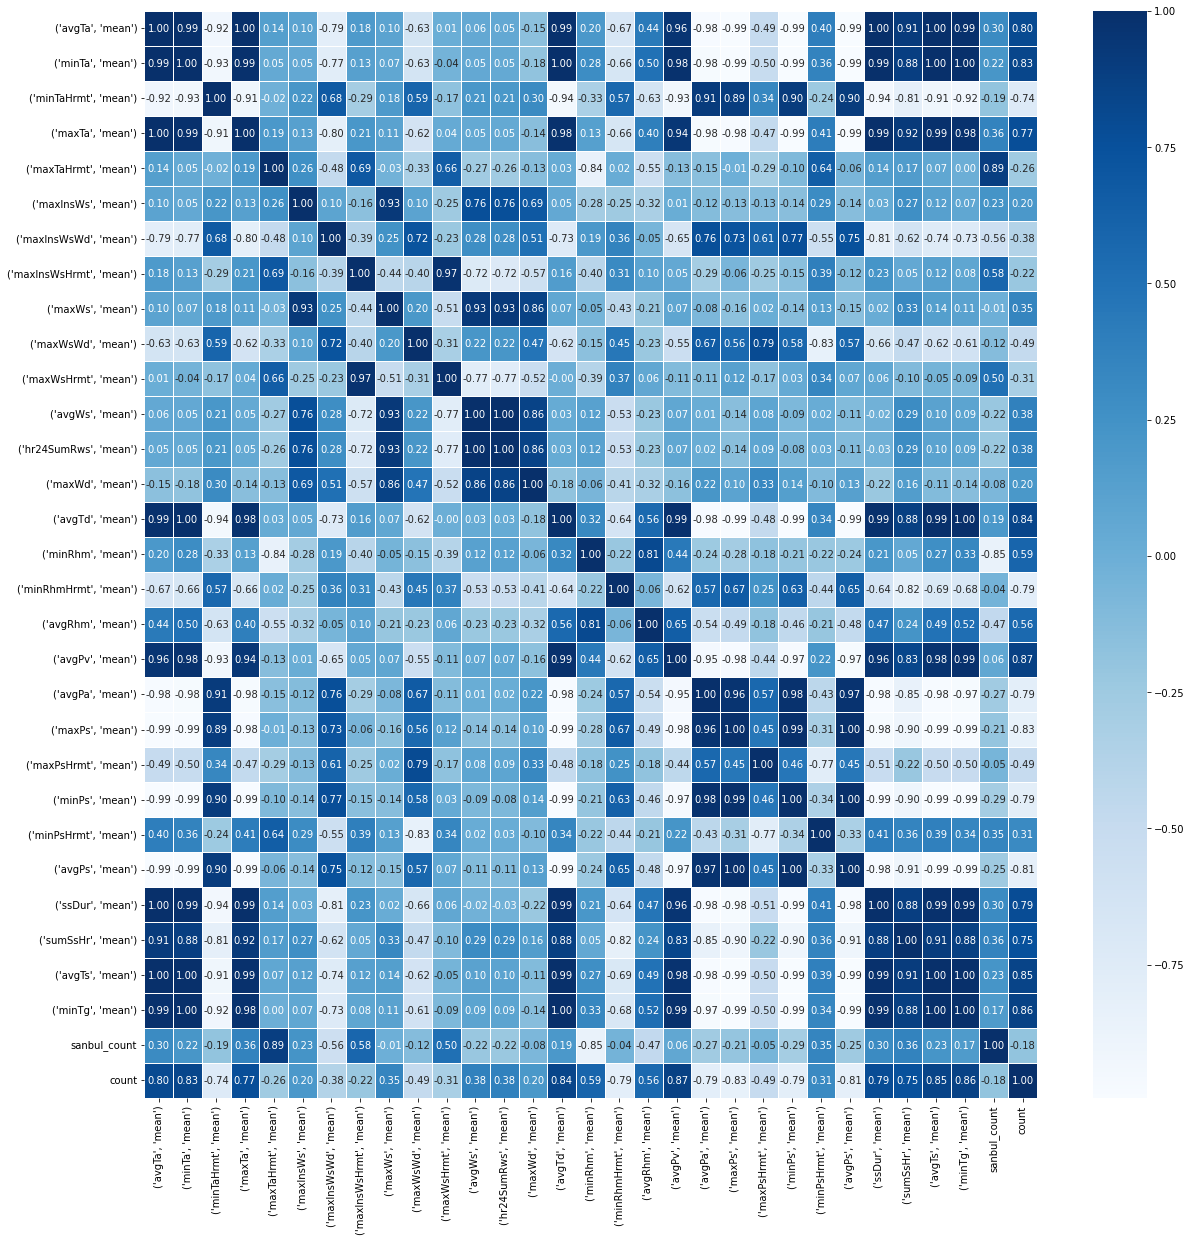

In [20]:
# 히트맵 그려보기
plt.figure(figsize=(20, 20))
sns.heatmap(data = df_mo.corr(), annot = True
            , fmt = '.2f', linewidths =.5, cmap= 'Blues')

In [21]:
list_co = [('avgTa', 'mean'),
              ('minTa', 'mean'),    ('minTaHrmt', 'mean'),
              ('maxTa', 'mean'),    ('maxTaHrmt', 'mean'),
           ('maxInsWs', 'mean'),   ('maxInsWsWd', 'mean'),
       ('maxInsWsHrmt', 'mean'),        ('maxWs', 'mean'),
            ('maxWsWd', 'mean'),    ('maxWsHrmt', 'mean'),
              ('avgWs', 'mean'),   ('hr24SumRws', 'mean'),
              ('maxWd', 'mean'),        ('avgTd', 'mean'),
             ('minRhm', 'mean'),   ('minRhmHrmt', 'mean'),
             ('avgRhm', 'mean'),        ('avgPv', 'mean'),
  'count']

In [22]:
import scipy.stats

scipy.stats.pearsonr(df_mo['count'], df_mo['sanbul_count'])

for i in list_co:
    cor_p = scipy.stats.pearsonr(df_mo[i], df_mo['sanbul_count'])
    
    print(i, cor_p)

('avgTa', 'mean') (0.3030640848147506, 0.4655908216052472)
('minTa', 'mean') (0.21624996193516227, 0.6069948833963033)
('minTaHrmt', 'mean') (-0.1909880132279748, 0.6505103810345256)
('maxTa', 'mean') (0.36317235626532374, 0.3765580589087034)
('maxTaHrmt', 'mean') (0.8862004090982283, 0.003377058473459275)
('maxInsWs', 'mean') (0.2319117162336943, 0.5805051178328159)
('maxInsWsWd', 'mean') (-0.5606917748851151, 0.14825713650912975)
('maxInsWsHrmt', 'mean') (0.5834932060895889, 0.1289099473409778)
('maxWs', 'mean') (-0.006893625657667338, 0.9870748613852777)
('maxWsWd', 'mean') (-0.12233535898097138, 0.7728995062490189)
('maxWsHrmt', 'mean') (0.5033759295629514, 0.20348673808182527)
('avgWs', 'mean') (-0.22243650654090089, 0.5964844891644258)
('hr24SumRws', 'mean') (-0.22331494554521492, 0.594996984184102)
('maxWd', 'mean') (-0.0760021020367066, 0.8580438732590353)
('avgTd', 'mean') (0.19352985085659155, 0.6460902603598027)
('minRhm', 'mean') (-0.8516529479658778, 0.0072805042256337636)

In [23]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [24]:
# from fbprophet import Prophet

In [25]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [26]:
df_mo.columns

Index([             'day_place',        ('avgTa', 'mean'),
              ('minTa', 'mean'),    ('minTaHrmt', 'mean'),
              ('maxTa', 'mean'),    ('maxTaHrmt', 'mean'),
           ('maxInsWs', 'mean'),   ('maxInsWsWd', 'mean'),
       ('maxInsWsHrmt', 'mean'),        ('maxWs', 'mean'),
            ('maxWsWd', 'mean'),    ('maxWsHrmt', 'mean'),
              ('avgWs', 'mean'),   ('hr24SumRws', 'mean'),
              ('maxWd', 'mean'),        ('avgTd', 'mean'),
             ('minRhm', 'mean'),   ('minRhmHrmt', 'mean'),
             ('avgRhm', 'mean'),        ('avgPv', 'mean'),
              ('avgPa', 'mean'),        ('maxPs', 'mean'),
          ('maxPsHrmt', 'mean'),        ('minPs', 'mean'),
          ('minPsHrmt', 'mean'),        ('avgPs', 'mean'),
              ('ssDur', 'mean'),      ('sumSsHr', 'mean'),
              ('avgTs', 'mean'),        ('minTg', 'mean'),
                 'sanbul_count',                  'count'],
      dtype='object')

In [27]:
import statsmodels.api as sm

# 데이터 불러오기

# crim, rm, lstat을 통한 다중 선형회귀분석
x_data = df_mo[[('avgTa', 'mean'),
              ('minTa', 'mean'),    ('minTaHrmt', 'mean'),
              ('maxTa', 'mean'),    ('maxTaHrmt', 'mean'),

]] #변수 여러개
target = df_mo[['sanbul_count']]

# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sanbul_count   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     120.1
Date:                Thu, 21 Jul 2022   Prob (F-statistic):            0.00828
Time:                        10:31:39   Log-Likelihood:                -13.766
No. Observations:                   8   AIC:                             39.53
Df Residuals:                       2   BIC:                             40.01
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -787.9143     88.269     -8.926      0.012   -1167.707    -408.121
('avgTa', 'mean')       -92.6290     11.935     -7.761      0.016    -143.981     -41.277
('minTa', 'mean')        30.7883      5.859      5.255      0.034       5.578      55.998
('minTaHrmt', 'mean')     0.0559      0.022      2.498      0.130      -0.040       0.152
('maxTa', 'mean')        62.9482      6.899      9.125      0.012      33.266      92.631
('maxTaHrmt', 'mean')     0.3879      0.071      5.457      0.032       0.082       0.694
==============================================================================
Omnibus:                        0.344   Durbin-Watson:                   2.918
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.431
Skew:                           0.227   Prob(JB):                        0.806
Kurtosis:                       1.958   Cond. No.                     1.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# x_data2 = df_mo[[('avgTa', 'mean'),
#               ('minTa', 'mean'),    ('minTaHrmt', 'mean'),
#               ('maxTa', 'mean'),    ('maxTaHrmt', 'mean'),
#            ('maxInsWs', 'mean'),   ('maxInsWsWd', 'mean'),
#        ('maxInsWsHrmt', 'mean'),        ('maxWs', 'mean'),
#             ('maxWsWd', 'mean'),    ('maxWsHrmt', 'mean'),
#               ('avgWs', 'mean'),   ('hr24SumRws', 'mean'),
#               ('maxWd', 'mean'),        ('avgTd', 'mean'),
#              ('minRhm', 'mean'),   ('minRhmHrmt', 'mean'),
#              ('avgRhm', 'mean'),        ('avgPv', 'mean'),
#               ('avgPa', 'mean'),        ('maxPs', 'mean'),
#           ('maxPsHrmt', 'mean'),        ('minPs', 'mean'),
#           ('minPsHrmt', 'mean'),        ('avgPs', 'mean'),
#               ('ssDur', 'mean'),      ('sumSsHr', 'mean'),
#               ('avgTs', 'mean'),        ('minTg', 'mean'),
#                 'count']]


In [29]:
x_data2 = df_mo[[('avgTa', 'mean'), ('minTaHrmt', 'mean'), ('maxInsWs', 'mean'), ('minRhm', 'mean'), ('ssDur', 'mean')]]

# 상수항 추가
x_data2_ = sm.add_constant(x_data2, has_constant = "add")

# 회귀모델 적합
multi_model2 = sm.OLS(target, x_data2_)
fitted_multi_model2 = multi_model2.fit()

# 결과 출력
fitted_multi_model2.summary()

# 다중공산성 발생됐다고 판단되는 osl결과
# Notes:
# [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
# [2] The condition number is large, 2.72e+09. This might indicate that there are
# strong multicollinearity or other numerical problems.

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sanbul_count   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     25.90
Date:                Thu, 21 Jul 2022   Prob (F-statistic):             0.0376
Time:                        10:31:39   Log-Likelihood:                -19.854
No. Observations:                   8   AIC:                             51.71
Df Residuals:                       2   BIC:                             52.19
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -128.7804    493.256     -0.261      0.818   -2251.088    1993.528
('avgTa', 'mean')        -5.6187      6.644     -0.846      0.487     -34.204      22.966
('minTaHrmt', 'mean')    -0.0882      0.072     -1.223      0.346      -0.398       0.222
('maxInsWs', 'mean')     12.2127     13.754      0.888      0.468     -46.964      71.389
('minRhm', 'mean')       -8.4959      0.846    -10.038      0.010     -12.137      -4.854
('ssDur', 'mean')        31.6275     36.696      0.862      0.480    -126.263     189.518
==============================================================================
Omnibus:                        0.290   Durbin-Watson:                   2.568
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.381
Skew:                           0.306   Prob(JB):                        0.826
Kurtosis:                       2.123   Cond. No.                     1.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# pip install statsmodels

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif

,VIF Factor,features
0,76.871502,"(avgTa, mean)"
1,719.523082,"(minTaHrmt, mean)"
2,1812.901695,"(maxInsWs, mean)"
3,70.890908,"(minRhm, mean)"
4,920.151850,"(ssDur, mean)"


In [32]:
import statsmodels.api as sm

# 데이터 불러오기

# crim, rm, lstat을 통한 다중 선형회귀분석
x_data = df_mo[[('avgTa', 'mean'),
              ('minTa', 'mean'),    ('minTaHrmt', 'mean'),
              ('maxTa', 'mean'),    ('maxTaHrmt', 'mean'),

]] #변수 여러개
target = df_mo[['sanbul_count']]

# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sanbul_count   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     120.1
Date:                Thu, 21 Jul 2022   Prob (F-statistic):            0.00828
Time:                        10:31:40   Log-Likelihood:                -13.766
No. Observations:                   8   AIC:                             39.53
Df Residuals:                       2   BIC:                             40.01
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -787.9143     88.269     -8.926      0.012   -1167.707    -408.121
('avgTa', 'mean')       -92.6290     11.935     -7.761      0.016    -143.981     -41.277
('minTa', 'mean')        30.7883      5.859      5.255      0.034       5.578      55.998
('minTaHrmt', 'mean')     0.0559      0.022      2.498      0.130      -0.040       0.152
('maxTa', 'mean')        62.9482      6.899      9.125      0.012      33.266      92.631
('maxTaHrmt', 'mean')     0.3879      0.071      5.457      0.032       0.082       0.694
==============================================================================
Omnibus:                        0.344   Durbin-Watson:                   2.918
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.431
Skew:                           0.227   Prob(JB):                        0.806
Kurtosis:                       1.958   Cond. No.                     1.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# # 모델 생성하기
# from sklearn.linear_model import LinearRegression

# mlr = LinearRegression()
# mlr.fit(x_train, y_train)

# 기상인자 x개를 넣으면 산불 면적 예측

In [34]:
# # x축은 실제 면적, y축은 예측한 면적
# plt.scatter(y_test, y_predict, alpha=0.4)
# plt.xlabel('Actual')
# plt.ylabel('Predict')
# plt.show()

In [35]:
# 회귀분석
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(X)).fit()

NameError: name 'Y' is not defined